# 1. Импорт библиотек и загрузка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from comet_ml import Experiment

In [2]:
# загрузка данных
df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
display(df.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# 2. Подготовка данных к визуализации

In [4]:
# анализ уникальных значений возраста пациентов
display(df['Age'].unique())

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [5]:
# избавимся от аномальных значений возраста пациентов
df = df[(df['Age'] >= 0) & (df['Age'] <= 110)]

In [6]:
display(df['Age'].value_counts())

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

In [7]:
# выделим 7 числовых признаков и зафиксируем их в переменной numeric_data
numeric_columns = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
numeric_data = df[numeric_columns]
display(numeric_data)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1
110523,51,0,0,0,0,0,1
110524,21,0,0,0,0,0,1
110525,38,0,0,0,0,0,1


In [8]:
# построим матрицу корреляции с помощью метода pandas - corr()
corr = numeric_data.corr()
display(corr)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092437,0.504726,0.292509,0.095862,0.077369,0.012676
Scholarship,-0.092437,1.000000,-0.019731,-0.024899,0.035019,-0.008520,0.001188
Hipertension,0.504726,-0.019731,1.000000,0.433096,0.087972,0.080249,-0.006309
Diabetes,0.292509,-0.024899,0.433096,1.000000,0.018471,0.057629,-0.014555
Alcoholism,0.095862,0.035019,0.087972,0.018471,1.000000,0.004689,-0.026151
Handcap,0.077369,-0.008520,0.080249,0.057629,0.004689,1.000000,-0.024026
SMS_received,0.012676,0.001188,-0.006309,-0.014555,-0.026151,-0.024026,1.000000


# 3. Создание эксперимента и визуализация данных

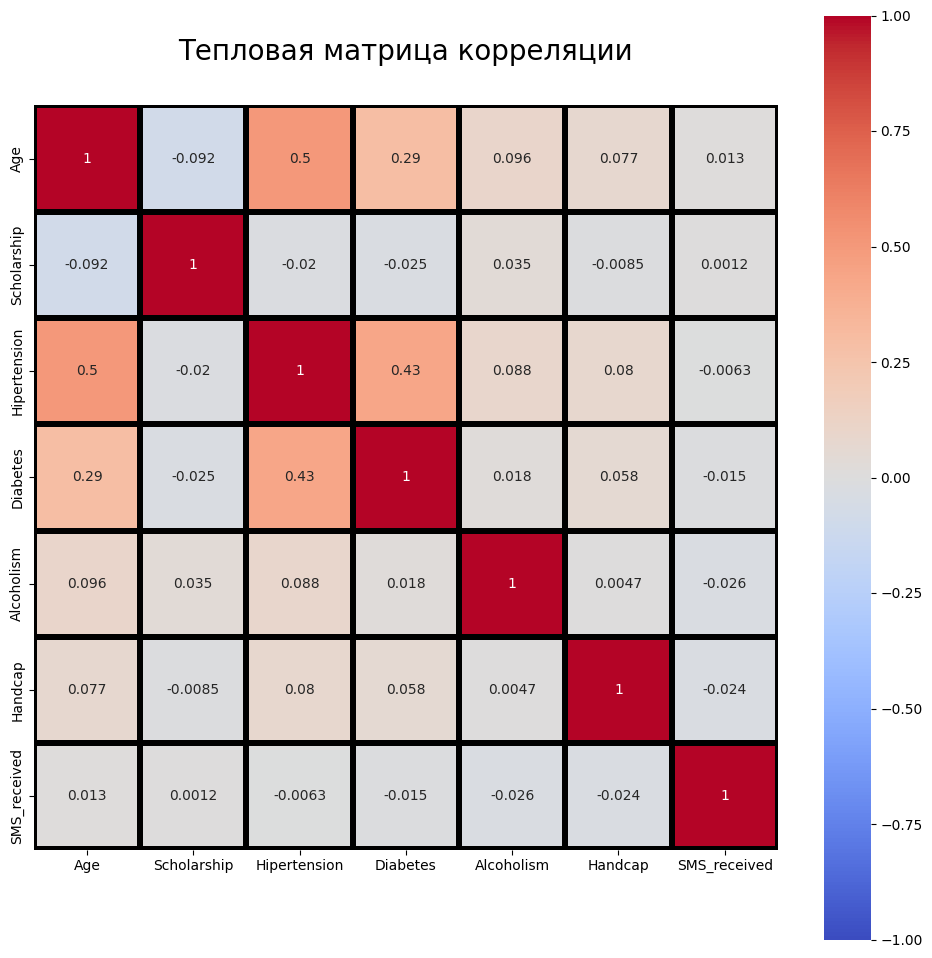

In [9]:
# визуализация тепловой матрицы корреляции
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    data=corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2g',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=3,
    linecolor='black',
    square=True,
    ax=ax
)
ax.set_title(
    label='Тепловая матрица корреляции',
    fontdict={
        'fontsize': 20
    },
    y=1.05
);

In [10]:
# создадим эксперимент
experiment = Experiment(
    api_key='Duf27nOXzxovaVtGaWvssRLlg',
    project_name='medical-appointment',
    workspace='an-petruhin'
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/an-petruhin/medical-appointment/07f8a446f1e94cde9f51e4b53d9582f4



In [11]:
# залогируем график
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.com/api/image/download?imageId=b7abcde5286f4286b63b5e133a20a505&experimentKey=07f8a446f1e94cde9f51e4b53d9582f4',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=b7abcde5286f4286b63b5e133a20a505&experimentKey=07f8a446f1e94cde9f51e4b53d9582f4',
 'imageId': 'b7abcde5286f4286b63b5e133a20a505'}

In [12]:
# завершим эксперимент
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/an-petruhin/medical-appointment/07f8a446f1e94cde9f51e4b53d9582f4
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET INFO: Please wait for metadata to finish uploading (timeout is 3600 seconds)
